# Árvore de Decisão

***

## Importando bibliotecas

In [50]:
#Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

#Classes do modelo de aprendizado
from sklearn.tree import DecisionTreeClassifier, plot_tree

#Funções de avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Conjunto de dados

In [51]:
#Carregando o dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/Francimaria/especializacao_DNN/main/datasets/Iris.csv")

In [52]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


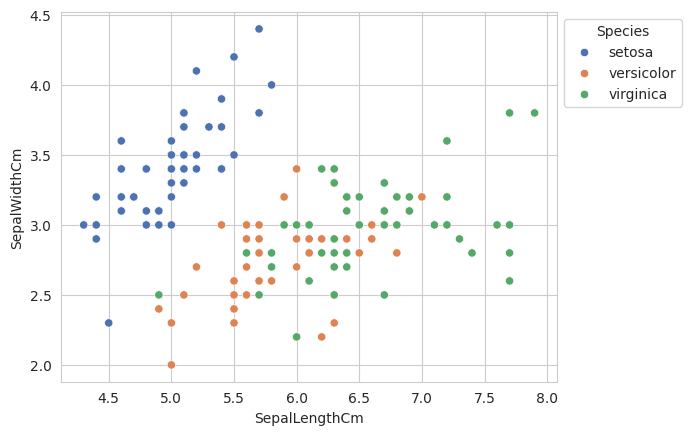

In [53]:
# Distribuição das classes pelas features SepalLengthCm e SepalWidthCm
sns.set_style('whitegrid')
ax = sns.scatterplot(dataset, x='SepalLengthCm',y='SepalWidthCm',
                palette='deep',hue='Species')

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


In [54]:
#Mapeando os valores da classe para inteiro (para fins de visualização da região de decisão)
dataset['Species'] = pd.factorize(dataset['Species'])[0]

# Setosa - 0
# Versicolor - 1
# Virginica - 2

### Separando o conjunto de dados 

In [55]:
#Vamos usar somente duas features SepalLengthCm e SepalWidthCm
X = dataset.loc[:,["SepalLengthCm", "SepalWidthCm"]] 
y = dataset.loc[:,["Species"]]
#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

## Classificação

[Documentação](https://scikit-learn.org/stable/modules/tree.html#)

In [56]:
#scikit-learn usa uma versão otimizada do algoritmo CART (similar ao C4.5)
# 
model = DecisionTreeClassifier(max_depth=3)
#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.75      0.67      0.71         9
           2       0.77      0.91      0.83        11

    accuracy                           0.83        30
   macro avg       0.84      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30



### Região de decisão

In [57]:
def show_decision_region(X, y, model):
    feature_0 = X.columns[0]
    feature_1 = X.columns[1]

    plot_decision_regions(np.array([X[feature_0].values,
                                    X[feature_1].values]).T,
                                    y.values.flatten(), model)
    plt.xlabel(feature_0)
    plt.ylabel(feature_1)

    plt.title(model.__class__.__name__)
    plt.show()

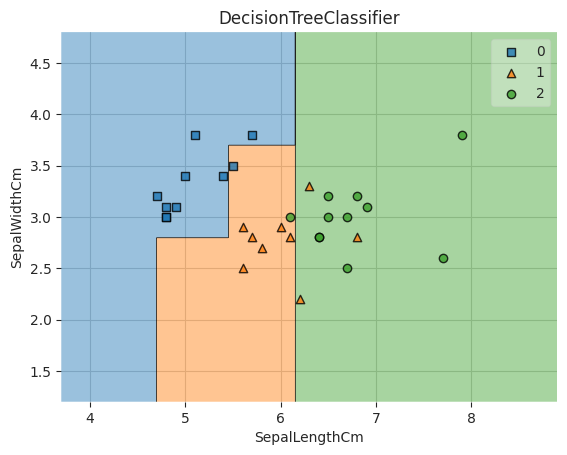

In [58]:
show_decision_region(X_test, y_test, model)

In [59]:
plt.figure(figsize=(100,100))

# Retorna uma lista contendo os dados para as caixas de anotação que compõem a árvore
tree = plot_tree(model, feature_names=["SepalLengthCm", "SepalWidthCm"], 
                 class_names=['setosa', 'versicolor', 'virginica'], filled=True)

### com as 4 features

In [60]:
#Vamos usar todas as features
X = dataset.iloc[:,0:4]
y = dataset.iloc[:,-1]
# y = dataset.loc[:,["Species"]]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [61]:
model = DecisionTreeClassifier(max_depth=3)
#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



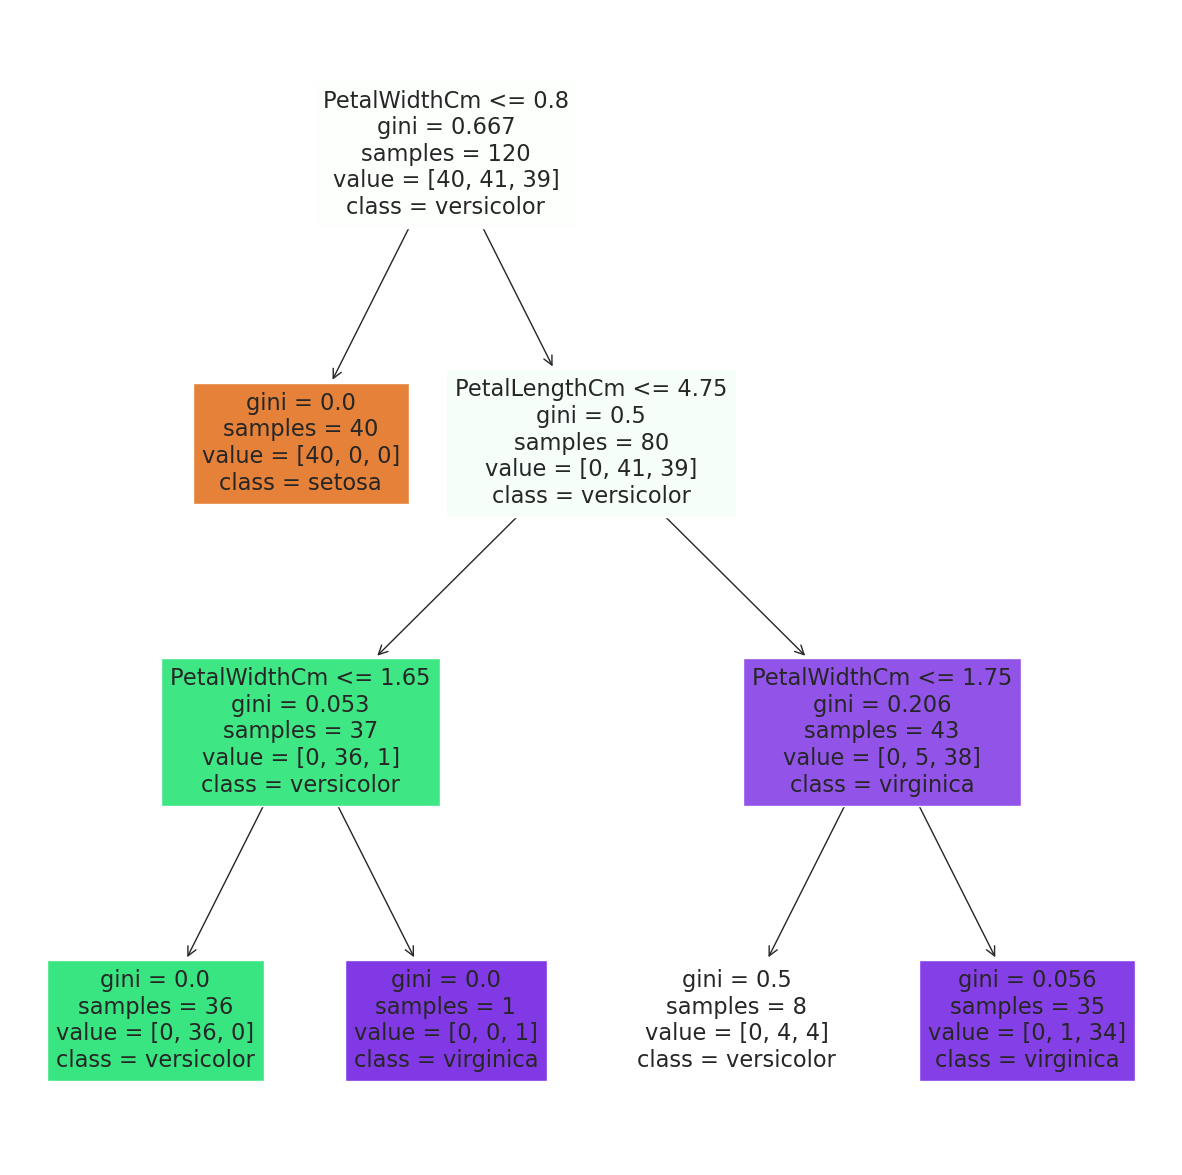

In [62]:
plt.figure(figsize=(15,15))
tree = plot_tree(model, feature_names=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"], 
                 class_names=['setosa', 'versicolor', 'virginica'], filled=True)
plt.show()

### E se mudarmos os parâmetros

**Criterion** é a função para medir a qualidade de uma divisão. Por padrão o critério usado é o coeficiente gini [Link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).

- coeficiente gini: Mede a probabilidade de uma variável específica ser classificada erroneamente quando escolhida aleatoriamente. 

$$gini(p) = 1-\sum_{i=1}^n p_i^2$$

$n$ respresenta o número de classes e $p_i$ a probabilidade  de escolher um item com rótulo $i$

- entropia: Entropia é o grau de incerteza, impureza ou desordem de uma variável aleatória ou uma medida de pureza.  

$$$$
    


In [63]:
for i, criterion in enumerate(['gini', 'entropy']):
    print(criterion.upper()+ "\n")
    model = DecisionTreeClassifier(criterion=criterion, max_depth=4)
    #treinando o modelo
    model.fit(X_train, y_train)    
    
    #predição
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    
plt.show()

GINI

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

ENTROPY

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



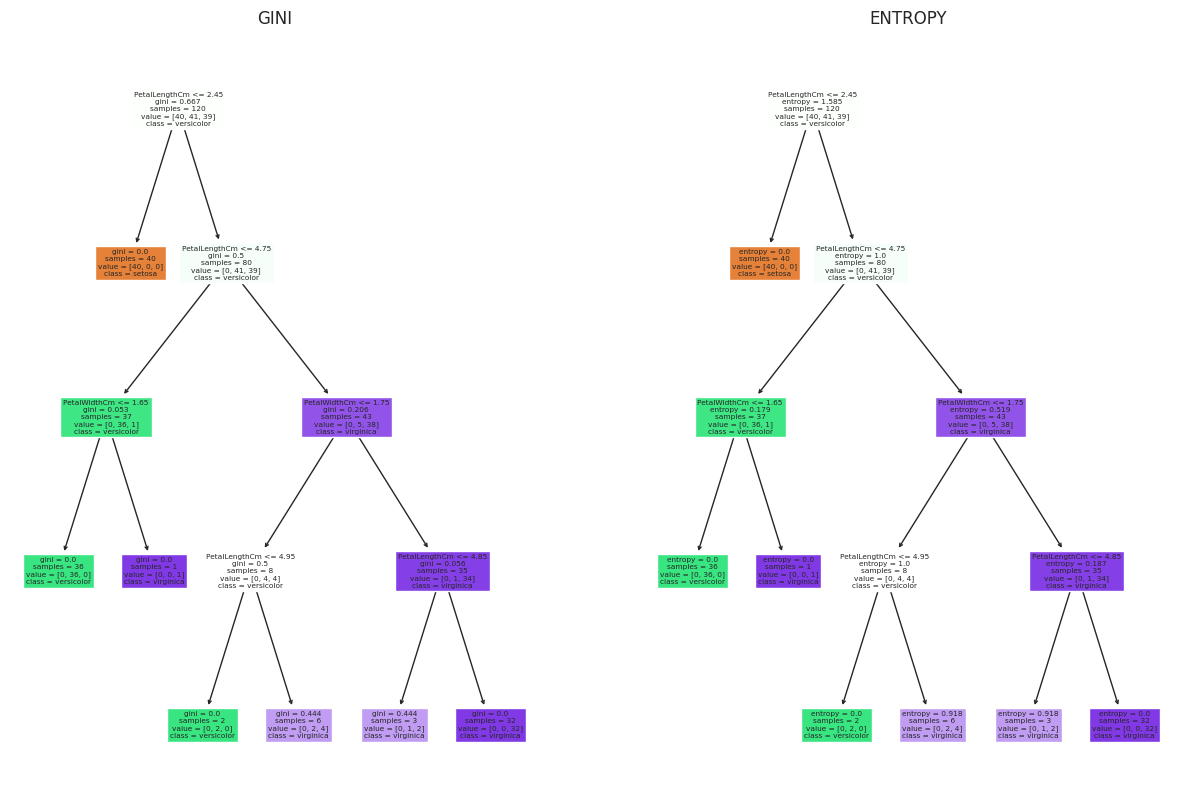

In [64]:
fig, ax = plt.subplots(1,2, figsize=(15,10))

for i, criterion in enumerate(['gini', 'entropy']):
    model = DecisionTreeClassifier(criterion=criterion, max_depth=4)
    #treinando o modelo
    model.fit(X_train, y_train)    
    
    tree = plot_tree(model, ax=ax[i],feature_names=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"],
                 class_names=['setosa', 'versicolor', 'virginica'], filled=True)
    ax[i].set_title(criterion.upper())
plt.show()

**max_depth** determina a profundidade máxima da árvore

In [65]:
for i, max_depth in enumerate([2,3,4]):
    print(f"MAX_DEPTH - {max_depth} \n ")
    model = DecisionTreeClassifier(max_depth=max_depth)
    #treinando o modelo
    model.fit(X_train, y_train)    
    
    #predição
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    
plt.show()

MAX_DEPTH - 2 
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

MAX_DEPTH - 3 
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

MAX_DEPTH - 4 
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00 

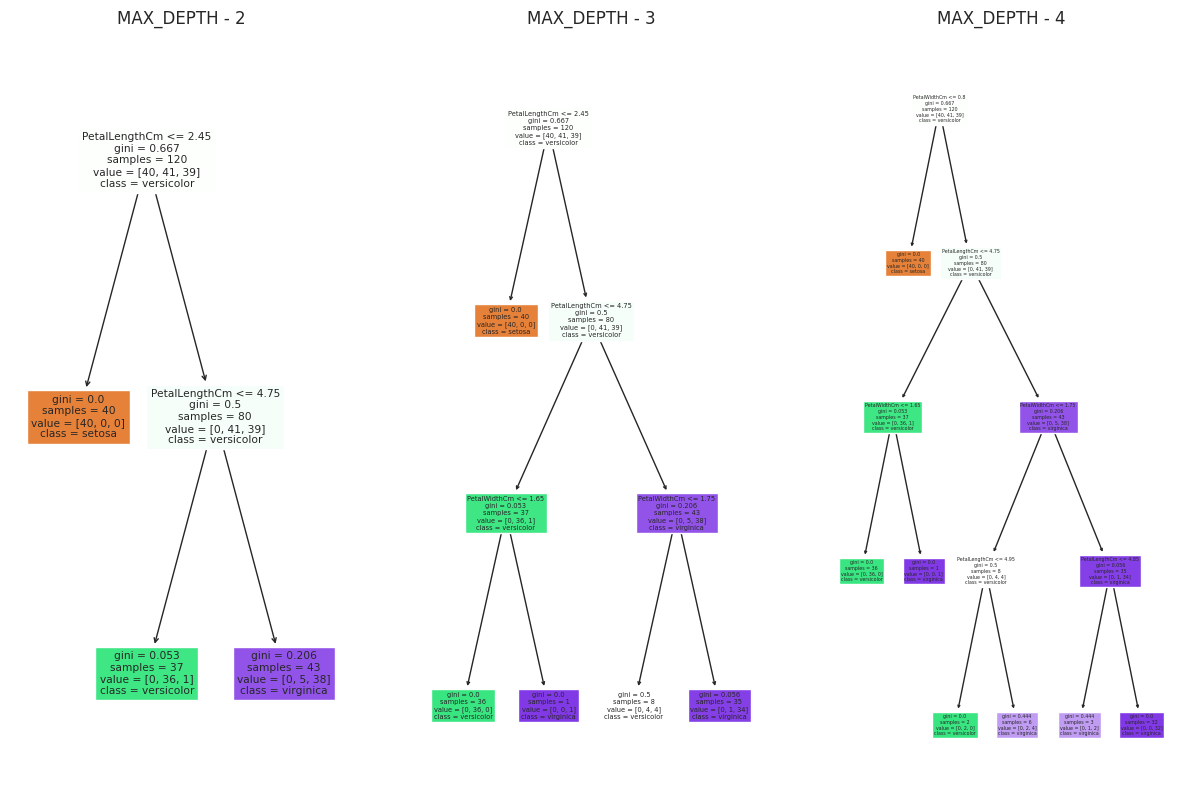

In [66]:
fig, ax = plt.subplots(1,3, figsize=(15,10))

for i, max_depth in enumerate([2,3,4]):
    model = DecisionTreeClassifier(max_depth=max_depth)
    #treinando o modelo
    model.fit(X_train, y_train)    
    
    tree = plot_tree(model, ax=ax[i],feature_names=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"],
                 class_names=['setosa', 'versicolor', 'virginica'], filled=True)
    ax[i].set_title(f"MAX_DEPTH - {max_depth}")
    
plt.show()